<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Drop-all-nans" data-toc-modified-id="Drop-all-nans-1">Drop all nans</a></span></li><li><span><a href="#Calculate-and-store-salary-difference" data-toc-modified-id="Calculate-and-store-salary-difference-2">Calculate and store salary difference</a></span></li><li><span><a href="#Determine-if-salary-changed-and-create-new-variable-for-this" data-toc-modified-id="Determine-if-salary-changed-and-create-new-variable-for-this-3">Determine if salary changed and create new variable for this</a></span></li><li><span><a href="#Now-this-is-the-dataframe-of-all-people-who-kept-their-jobs,-and-have-usable-data" data-toc-modified-id="Now-this-is-the-dataframe-of-all-people-who-kept-their-jobs,-and-have-usable-data-4">Now this is the dataframe of all people who kept their jobs, and have usable data</a></span></li><li><span><a href="#Just-store-everything-done-in-a-new-dataframe" data-toc-modified-id="Just-store-everything-done-in-a-new-dataframe-5">Just store everything done in a new dataframe</a></span></li><li><span><a href="#Check-balance-of-classes-that-are-being-predicted" data-toc-modified-id="Check-balance-of-classes-that-are-being-predicted-6">Check balance of classes that are being predicted</a></span></li><li><span><a href="#First-model" data-toc-modified-id="First-model-7">First model</a></span></li><li><span><a href="#Second-model---no-provinces" data-toc-modified-id="Second-model---no-provinces-8">Second model - no provinces</a></span></li><li><span><a href="#First-model" data-toc-modified-id="First-model-9">First model</a></span></li></ul></div>

# Imports

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

#Logistic Regression Stuff
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
dem = pd.read_csv('Demographics.csv')

In [3]:
lab = pd.read_csv('Labour.csv')

In [4]:
dftemp = pd.concat([dem,lab],axis=1)

In [5]:
dftemp.head(11)

,age,gender,race,highest_grade,tertiary_edu,province_current,province_moved,province_before,province_during,labour_in_feb,...,work_hours_feb,take_home_pay_feb,labour_in_apr,work_days_apr,work_hours_apr,take_home_pay_apr,lost_labour,kept_labour,return_to_work,usual_work
0,39.0,Man,White,Grade 9,No,Gauteng,No,NaN,NaN,1,...,NaN,180.0,0,0.0,0.0,0.0,1,0,0,Unknown
1,72.0,Woman,Asian/Indian,Grade 0,NaN,KwaZulu-Natal,No,NaN,NaN,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
2,30.0,Woman,African/Black,Grade 10,Yes,Gauteng,No,NaN,NaN,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
3,48.0,Woman,African/Black,Grade 10,No,Gauteng,No,NaN,NaN,1,...,5.0,900.0,0,0.0,0.0,0.0,1,0,1,Elementary occupations
4,49.0,Woman,African/Black,Grade 9,No,Gauteng,No,NaN,NaN,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
5,34.0,Man,African/Black,Grade 9,No,Gauteng,No,NaN,NaN,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
6,63.0,Man,African/Black,Grade 11,No,Gauteng,No,NaN,NaN,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
7,50.0,Woman,African/Black,Grade 6,NaN,Gauteng,No,NaN,NaN,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
8,NaN,Woman,African/Black,Grade 0,NaN,Gauteng,No,NaN,NaN,0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,0,Not Employed
9,31.0,Man,African/Black,Grade 10,No,Gauteng,No,NaN,NaN,1,...,10.0,8000.0,0,0.0,0.0,0.0,1,0,0,Unknown


In [6]:
df_main = dftemp[["age","gender","race","highest_grade","province_current", "tertiary_edu","take_home_pay_feb", "take_home_pay_apr","kept_labour","usual_work"]]


## Drop all nans

In [7]:
display(df_main)
df_main_dropped_nans = df_main.dropna()
display(df_main_dropped_nans)

,age,gender,race,highest_grade,province_current,tertiary_edu,take_home_pay_feb,take_home_pay_apr,kept_labour,usual_work
0,39.0,Man,White,Grade 9,Gauteng,No,180.0,0.0,0,Unknown
1,72.0,Woman,Asian/Indian,Grade 0,KwaZulu-Natal,NaN,0.0,0.0,0,Not Employed
2,30.0,Woman,African/Black,Grade 10,Gauteng,Yes,0.0,0.0,0,Not Employed
3,48.0,Woman,African/Black,Grade 10,Gauteng,No,900.0,0.0,0,Elementary occupations
4,49.0,Woman,African/Black,Grade 9,Gauteng,No,0.0,0.0,0,Not Employed
...,...,...,...,...,...,...,...,...,...,...
7068,22.0,Man,African/Black,Grade 11,Northern Cape,No,0.0,0.0,0,Not Employed
7069,24.0,Woman,Coloured,Grade 10,Western Cape,No,0.0,0.0,0,Not Employed
7070,36.0,Woman,African/Black,NTC 3,North West,No,0.0,0.0,0,Not Employed
7071,20.0,Man,African/Black,Grade 12,North West,No,0.0,0.0,0,Not Employed


,age,gender,race,highest_grade,province_current,tertiary_edu,take_home_pay_feb,take_home_pay_apr,kept_labour,usual_work
0,39.0,Man,White,Grade 9,Gauteng,No,180.0,0.0,0,Unknown
2,30.0,Woman,African/Black,Grade 10,Gauteng,Yes,0.0,0.0,0,Not Employed
3,48.0,Woman,African/Black,Grade 10,Gauteng,No,900.0,0.0,0,Elementary occupations
4,49.0,Woman,African/Black,Grade 9,Gauteng,No,0.0,0.0,0,Not Employed
5,34.0,Man,African/Black,Grade 9,Gauteng,No,0.0,0.0,0,Not Employed
...,...,...,...,...,...,...,...,...,...,...
7068,22.0,Man,African/Black,Grade 11,Northern Cape,No,0.0,0.0,0,Not Employed
7069,24.0,Woman,Coloured,Grade 10,Western Cape,No,0.0,0.0,0,Not Employed
7070,36.0,Woman,African/Black,NTC 3,North West,No,0.0,0.0,0,Not Employed
7071,20.0,Man,African/Black,Grade 12,North West,No,0.0,0.0,0,Not Employed


## Calculate and store salary difference

In [8]:

diff = df_main_dropped_nans['take_home_pay_apr'] - df_main_dropped_nans['take_home_pay_feb']

display(diff)

perc = (diff/df_main_dropped_nans['take_home_pay_feb'])* 100

perc = np.nan_to_num(perc)
display(perc)

df_main_diff = df_main_dropped_nans.copy()

df_main_diff['take_home_pay_difference'] = perc


0      -180.0
2         0.0
3      -900.0
4         0.0
5         0.0
        ...  
7068      0.0
7069      0.0
7070      0.0
7071      0.0
7072      0.0
Length: 4284, dtype: float64

array([-100.,    0., -100., ...,    0.,    0.,    0.])

## Determine if salary changed and create new variable for this

In [9]:

def salary_change(diff):
    if diff==0:
        return "unchanged"
    else:
        return "changed"
    

df_main_diff['salary_change'] = np.vectorize(salary_change)(df_main_diff['take_home_pay_difference'])

## Now this is the dataframe of all people who kept their jobs, and have usable data

In [10]:
df_main_kept_labour = df_main_diff[df_main_diff['kept_labour']==1]
display(df_main_kept_labour.loc[df_main_kept_labour['kept_labour']==1,['take_home_pay_feb', 'take_home_pay_apr', 'take_home_pay_difference', 'salary_change']])
print(list(df_main_kept_labour))

,take_home_pay_feb,take_home_pay_apr,take_home_pay_difference,salary_change
15,25000.0,25000.0,0.000000,unchanged
20,3500.0,3500.0,0.000000,unchanged
41,4600.0,4600.0,0.000000,unchanged
44,4000.0,4200.0,5.000000,changed
45,3500.0,7200.0,105.714286,changed
...,...,...,...,...
7001,3200.0,3200.0,0.000000,unchanged
7016,4400.0,4500.0,2.272727,changed
7018,24000.0,12000.0,-50.000000,changed
7021,1500.0,2800.0,86.666667,changed


['age', 'gender', 'race', 'highest_grade', 'province_current', 'tertiary_edu', 'take_home_pay_feb', 'take_home_pay_apr', 'kept_labour', 'usual_work', 'take_home_pay_difference', 'salary_change']


# Encode some variables and get dummies

In [11]:
df_main_kept_labour['gender'] = df_main_kept_labour['gender'].map({'Man':1, 'Woman':0})
df_main_kept_labour['gender'] = df_main_kept_labour['gender'].astype(int)

<ipython-input-11-312a54bd92ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_kept_labour['gender'] = df_main_kept_labour['gender'].map({'Man':1, 'Woman':0})
<ipython-input-11-312a54bd92ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_kept_labour['gender'] = df_main_kept_labour['gender'].astype(int)


In [12]:
df_main_kept_labour['tertiary_edu'] = df_main_kept_labour['tertiary_edu'].map({'Yes':1, 'No':0})
df_main_kept_labour['tertiary_edu'] = df_main_kept_labour['tertiary_edu'].astype(int)

<ipython-input-12-e72c4e46dabb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_kept_labour['tertiary_edu'] = df_main_kept_labour['tertiary_edu'].map({'Yes':1, 'No':0})
<ipython-input-12-e72c4e46dabb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_kept_labour['tertiary_edu'] = df_main_kept_labour['tertiary_edu'].astype(int)


In [13]:
df_dummies = pd.get_dummies(df_main_kept_labour, columns=["gender","race","highest_grade","province_current", "usual_work"], drop_first=True)
display(df_dummies)
print(df_dummies.columns)

,age,tertiary_edu,take_home_pay_feb,take_home_pay_apr,kept_labour,take_home_pay_difference,salary_change,gender_1,race_Asian/Indian,race_Coloured,...,usual_work_Managers,usual_work_Not Employed,usual_work_Not applicable,"usual_work_Plant and machine operators, and assemblers",usual_work_Professionals,usual_work_Self-Employed,usual_work_Service and sales workers,"usual_work_Skilled agricultural, forestry and fishery workers",usual_work_Technicians and associate professionals,usual_work_Unknown
15,52.0,0,25000.0,25000.0,1,0.000000,unchanged,0,0,1,...,0,0,0,0,0,0,0,0,1,0
20,40.0,0,3500.0,3500.0,1,0.000000,unchanged,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,37.0,1,4600.0,4600.0,1,0.000000,unchanged,0,0,0,...,0,0,0,0,1,0,0,0,0,0
44,45.0,1,4000.0,4200.0,1,5.000000,changed,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45,39.0,1,3500.0,7200.0,1,105.714286,changed,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,43.0,0,3200.0,3200.0,1,0.000000,unchanged,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,29.0,0,4400.0,4500.0,1,2.272727,changed,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7018,30.0,1,24000.0,12000.0,1,-50.000000,changed,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7021,27.0,0,1500.0,2800.0,1,86.666667,changed,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Index(['age', 'tertiary_edu', 'take_home_pay_feb', 'take_home_pay_apr',
       'kept_labour', 'take_home_pay_difference', 'salary_change', 'gender_1',
       'race_Asian/Indian', 'race_Coloured', 'race_White',
       'highest_grade_Grade 11', 'highest_grade_Grade 12',
       'highest_grade_Grade 9', 'highest_grade_NCV 2', 'highest_grade_NCV 4',
       'highest_grade_NTC 1', 'highest_grade_NTC 3',
       'province_current_Free State', 'province_current_Gauteng',
       'province_current_KwaZulu-Natal', 'province_current_Limpopo',
       'province_current_Mpumalanga', 'province_current_North West',
       'province_current_Northern Cape', 'province_current_Western Cape',
       'usual_work_Clerical support workers',
       'usual_work_Craft and related trades workers',
       'usual_work_Elementary occupations', 'usual_work_Managers',
       'usual_work_Not Employed', 'usual_work_Not applicable',
       'usual_work_Plant and machine operators, and assemblers',
       'usual_work_Professi

## Just store everything done in a new dataframe

In [14]:
df_final = df_dummies.copy()

## Check balance of classes that are being predicted

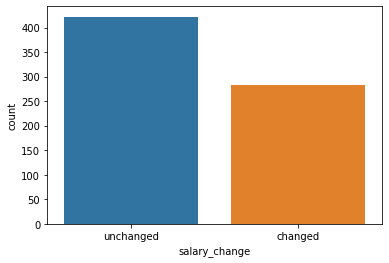

In [15]:
sns.countplot(data = df_main_kept_labour, x = 'salary_change')
plt.show()

# Logistic regression

Trying to predict whether or not their salary would change

## First model

,age,tertiary_edu,take_home_pay_feb,take_home_pay_apr,kept_labour,gender_1,race_Asian/Indian,race_Coloured,race_White,highest_grade_Grade 11,...,usual_work_Managers,usual_work_Not Employed,usual_work_Not applicable,"usual_work_Plant and machine operators, and assemblers",usual_work_Professionals,usual_work_Self-Employed,usual_work_Service and sales workers,"usual_work_Skilled agricultural, forestry and fishery workers",usual_work_Technicians and associate professionals,usual_work_Unknown
15,52.0,0,25000.0,25000.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
20,40.0,0,3500.0,3500.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
41,37.0,1,4600.0,4600.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
44,45.0,1,4000.0,4200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45,39.0,1,3500.0,7200.0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,43.0,0,3200.0,3200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,29.0,0,4400.0,4500.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7018,30.0,1,24000.0,12000.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7021,27.0,0,1500.0,2800.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1






62.73585%


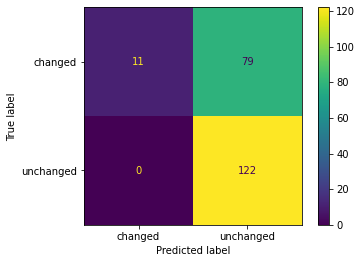

In [16]:
X = df_final.drop(['take_home_pay_difference', 'salary_change'],axis=1)

y = df_final['salary_change']

display(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


y_pred = log_model.predict(X_test)
print("\n\n\n\n{:.5%}". format(accuracy_score(y_test, y_pred)))


plot_confusion_matrix(log_model,X_test, y_test)
plt.show()

## Second model - no provinces

,age,tertiary_edu,take_home_pay_feb,take_home_pay_apr,kept_labour,gender_1,race_Asian/Indian,race_Coloured,race_White,highest_grade_Grade 11,...,usual_work_Managers,usual_work_Not Employed,usual_work_Not applicable,"usual_work_Plant and machine operators, and assemblers",usual_work_Professionals,usual_work_Self-Employed,usual_work_Service and sales workers,"usual_work_Skilled agricultural, forestry and fishery workers",usual_work_Technicians and associate professionals,usual_work_Unknown
15,52.0,0,25000.0,25000.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
20,40.0,0,3500.0,3500.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
41,37.0,1,4600.0,4600.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
44,45.0,1,4000.0,4200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45,39.0,1,3500.0,7200.0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,43.0,0,3200.0,3200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,29.0,0,4400.0,4500.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7018,30.0,1,24000.0,12000.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7021,27.0,0,1500.0,2800.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1






68.39623%


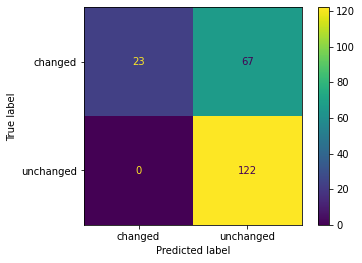

In [17]:
#Remove province_current
df_temp = df_main_kept_labour.drop(['province_current'], axis=1)
df_dummies = pd.get_dummies(df_temp, columns=["gender","race","highest_grade", "usual_work"], drop_first=True)
df_final = df_dummies.copy()



X = df_final.drop(['take_home_pay_difference', 'salary_change'],axis=1)

y = df_final['salary_change']

display(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


y_pred = log_model.predict(X_test)
print("\n\n\n\n{:.5%}". format(accuracy_score(y_test, y_pred)))


plot_confusion_matrix(log_model,X_test, y_test)
plt.show()